<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/W4_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes=True)
sns.set_palette(palette='magma',n_colors=8)



In [4]:
import io
data=pd.read_csv('Impact_music_mental_health.csv')
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
data.shape
data.info()
data.describe().T
data.describe(exclude='number').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

,count,unique,top,freq
Timestamp,736,729,09/01/2022 15:24,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


In [6]:
##Remove outliers
age_index=data[(data['Age']>70)].index
data=data.drop(age_index,axis=0)

hpd_index=data[(data['Hours per day']>=15)].index
data=data.drop(hpd_index,axis=0)

data_index=data[(data['BPM']>200)].index
data=data.drop(data_index,axis=0)



In [7]:
#Removing not-needed column
data.drop(['Timestamp','Permissions'],axis=1,inplace=True)



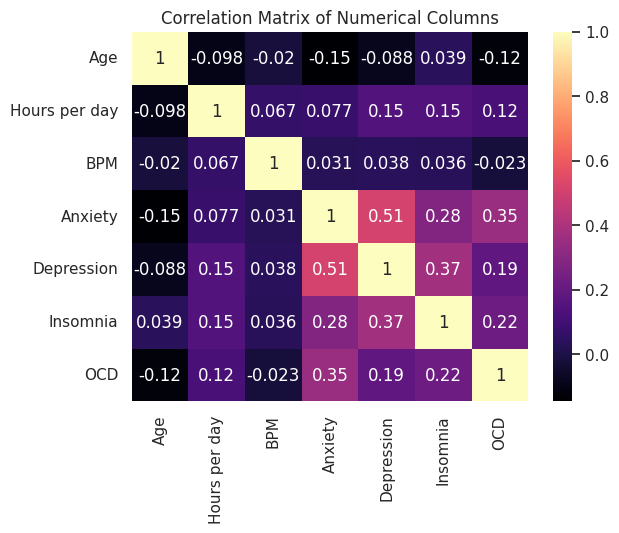

In [8]:
#####Correlation check
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=np.number)

corr_data = numerical_data.corr()['Age']
corr_data.sort_values()

sns.heatmap(numerical_data.corr(), annot=True, cmap='magma')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [9]:
##Removing missing values
data.isnull().sum()

data['Age']=data['Age'].fillna(round(data['Age'].mean(),0))

In [10]:
data['Age']=data['Age'].fillna(round(data['Age'].mean(),0))
data['Primary streaming service']=data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0])
data['While working']=data['While working'].fillna(data['While working'].mode()[0])
data['Instrumentalist']=data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])
data['Composer']=data['Composer'].fillna(data['Composer'].mode()[0])
data['Composer']=data['Composer'].fillna(data['Composer'].mode()[0])
data['Foreign languages']=data['Foreign languages'].fillna(data['Foreign languages'].mode()[0])
data['Music effects']=data['Music effects'].fillna(data['Music effects'].mode()[0])

miss_bpm=data[data['BPM'].isnull()==True]
miss_bpm

miss_bpm['Fav genre'].unique()

miss_bpm_genre=['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical', 'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel', 'K pop', 'Rap']

for i in miss_bpm_genre:
  data['BPM']=data['BPM'].fillna(round(data[data['Fav genre']==i]['BPM'].mean(),0))

In [11]:
##Data check and copy
data.shape
df=data.copy()

<Axes: xlabel='Age', ylabel='Count'>

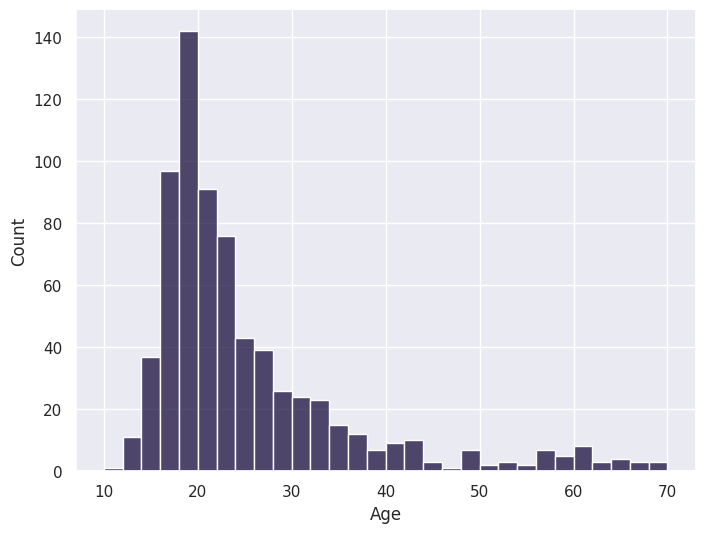

In [12]:
#Data visualisation (continue with other parameters)
plt.figure(figsize=(8,6))
sns.histplot(data['Age'])

Text(0.5, 0, 'EDM Music')

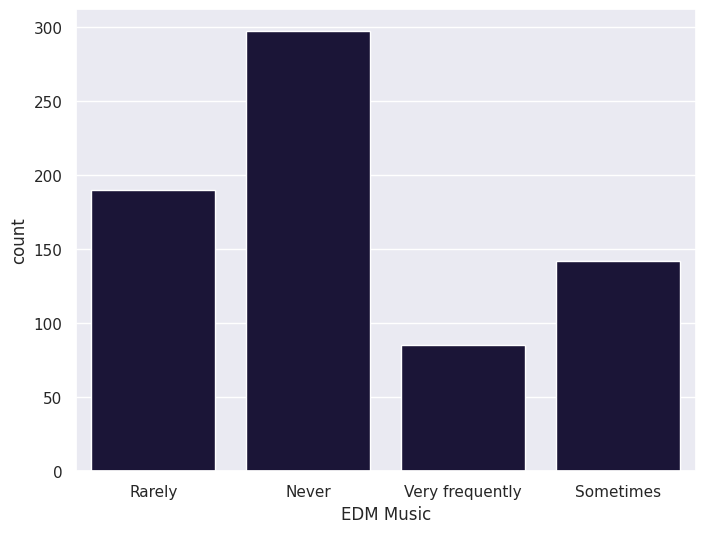

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [EDM]'])
plt.xlabel('EDM Music')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

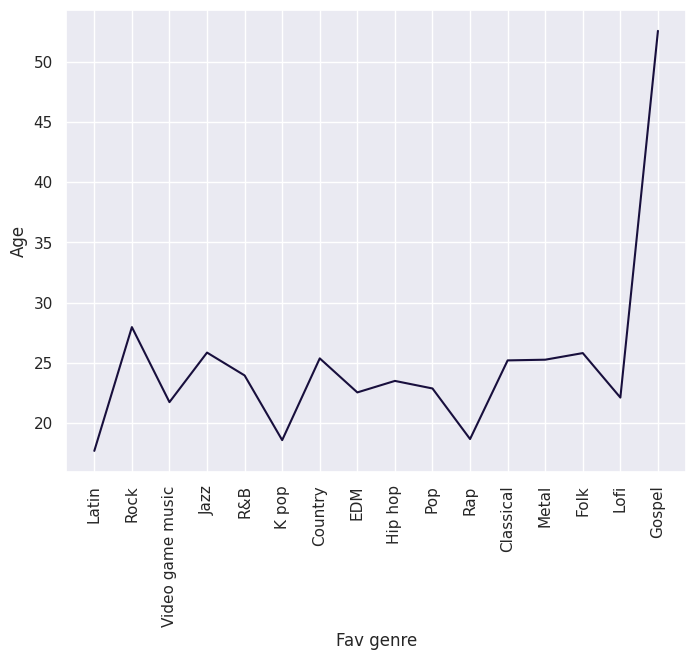

In [15]:
##Bivariate Analysis
plt.figure(figsize=(8,6))
sns.lineplot(x=data['Fav genre'], y=data['Age'],ci=None)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

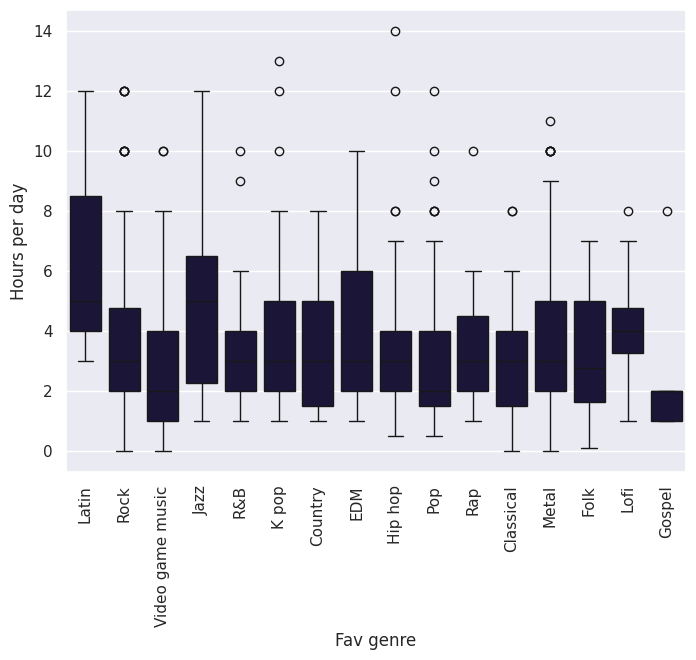

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Fav genre'], y=data['Hours per day'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

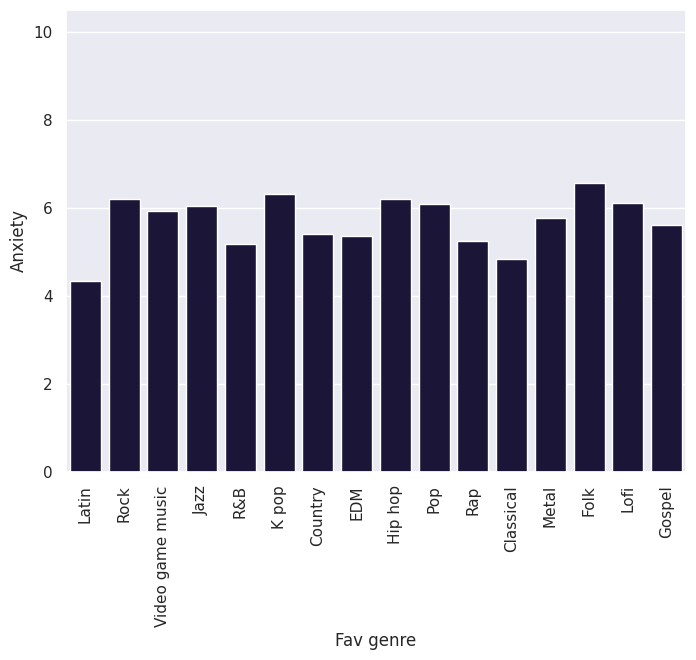

In [17]:
##Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'],errwidth=0)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

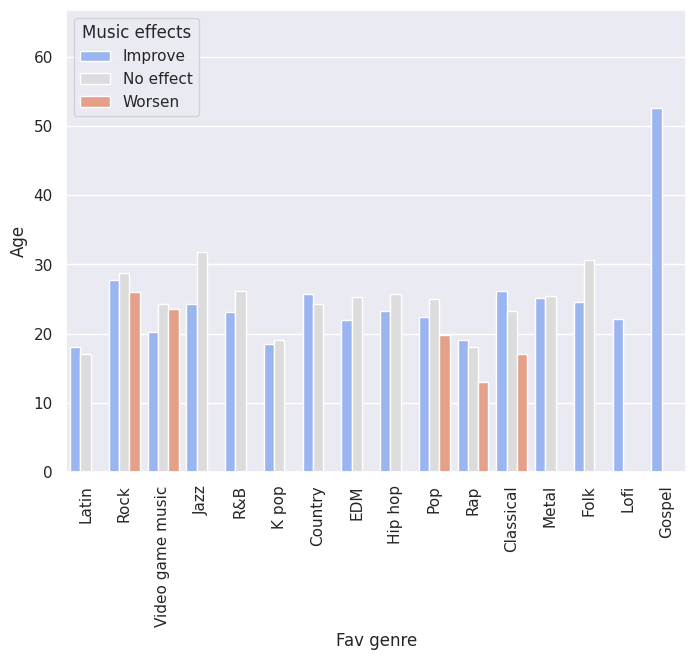

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Age'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
